In [1]:
a = 27.99
b = 30
a * b

839.6999999999999

In [5]:
import requests
headers = {
  'User-Agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36'  
}
res = requests.get('https://rent.591.com.tw/home/search/rsList?is_new_list=1&type=1&kind=1&searchtype=1&region=1&section=5', headers = headers)
jd = res.json()

In [9]:
import pandas
df = pandas.DataFrame(jd['data']['data'])
df = df[['address', 'floor', 'allfloor', 'layout','area', 'price','browsenum_all']]
df

,address,floor,allfloor,layout,area,price,browsenum_all
0,四維路52巷大安捷運300公..,4,5,2房1廳1衛,22.0,"34,000",4664
1,和平東路二段復興南..,2,4,2房1廳1衛,16.0,"23,909",7878
2,樂利路大安區六張犁捷運站..,4,7,3房2廳2衛,38.0,"43,800",3301
3,羅斯福路三段屋主自租~客..,18,19,3房2廳3衛,105.2,"115,000",1436
4,羅斯福路二段77巷師大運動..,3,5,3房2廳2衛,36.0,"42,000",1149
5,羅斯福路三段可租售！基泰..,18,19,3房2廳2衛,105.2,"115,000",383
6,基隆路二段世貿101、飯店..,5,12,1房1廳1衛,13.7,"29,000",648
7,羅斯福路三段283巷★近台..,7,12,3房2廳2衛,38.4,"46,500",185
8,忠孝東路四段216巷近仁愛路學校銀行醫..,6,7,4房2廳2衛,45.0,"50,000",392
9,金華街48巷美裝潢兩..,7,7,2房1廳1衛,20.0,"28,800",3808


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
address          30 non-null object
floor            30 non-null int64
allfloor         30 non-null int64
layout           30 non-null object
area             30 non-null float64
price            30 non-null object
browsenum_all    30 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 1.7+ KB


In [11]:
df[['layout_bedroom', 'layout_livingroom', 'layout_bathroom']] = df['layout'].str.extract('(\d+)房(\d+)廳(\d+)衛', expand=False)
df.head()

,address,floor,allfloor,layout,area,price,browsenum_all,layout_bedroom,layout_livingroom,layout_bathroom
0,四維路52巷大安捷運300公..,4,5,2房1廳1衛,22.0,"34,000",4664,2,1,1
1,和平東路二段復興南..,2,4,2房1廳1衛,16.0,"23,909",7878,2,1,1
2,樂利路大安區六張犁捷運站..,4,7,3房2廳2衛,38.0,"43,800",3301,3,2,2
3,羅斯福路三段屋主自租~客..,18,19,3房2廳3衛,105.2,"115,000",1436,3,2,3
4,羅斯福路二段77巷師大運動..,3,5,3房2廳2衛,36.0,"42,000",1149,3,2,2


In [14]:
df['price'] = df['price'].map(lambda e: int(''.join(e.split(','))))

In [17]:
df.to_excel('house591.xlsx')

In [19]:
import sqlite3
with sqlite3.connect('house.sqlite') as db:
    df.to_sql('renthouse2', con= db)

In [21]:
with sqlite3.connect('house.sqlite') as db:
    df2 = pandas.read_sql_query('select * from renthouse2', con= db)
df2.head()

,index,address,floor,allfloor,layout,area,price,browsenum_all,layout_bedroom,layout_livingroom,layout_bathroom
0,0,四維路52巷大安捷運300公..,4,5,2房1廳1衛,22.0,34000,4664,2,1,1
1,1,和平東路二段復興南..,2,4,2房1廳1衛,16.0,23909,7878,2,1,1
2,2,樂利路大安區六張犁捷運站..,4,7,3房2廳2衛,38.0,43800,3301,3,2,2
3,3,羅斯福路三段屋主自租~客..,18,19,3房2廳3衛,105.2,115000,1436,3,2,3
4,4,羅斯福路二段77巷師大運動..,3,5,3房2廳2衛,36.0,42000,1149,3,2,2


In [23]:
df.describe()

,floor,allfloor,area,price,browsenum_all
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,7.566667,10.366667,47.763333,73043.633333,1216.133333
std,5.164089,4.730556,30.783543,58145.741139,1660.599408
min,1.000000,4.000000,10.200000,23909.000000,95.000000
25%,4.000000,7.000000,26.325000,36500.000000,379.250000
50%,6.500000,9.000000,38.200000,49400.000000,577.000000
75%,10.000000,13.500000,53.600000,103375.000000,1137.000000
max,19.000000,19.000000,117.100000,260000.000000,7878.000000


In [26]:
df.sort_values(['price'], ascending=False).head()

,address,floor,allfloor,layout,area,price,browsenum_all,layout_bedroom,layout_livingroom,layout_bathroom
16,敦化南路二段敦南國家藝術..,11,14,4房3廳3衛,80.0,260000,378,4,3,3
26,羅斯福路三段可短租◎頂樓..,19,19,3房2廳2衛,103.0,200000,362,3,2,2
10,新生南路二段頂高麗景大安..,3,15,3房2廳3衛,117.1,185000,863,3,2,3
19,仁愛路三段5巷全新千萬裝..,7,10,3房3廳3衛,55.8,135000,264,3,3,3
14,"敦化南路一段捷運出口,歐式裝潢高級毫..",10,12,3房2廳2衛,62.4,120000,548,3,2,2


In [27]:
import requests
url = 'https://rent.591.com.tw/home/search/rsList?is_new_list=1&type=1&kind=1&searchtype=1&region=1&section=5&firstRow={}&totalRows=571'
headers = {
   'User-Agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36' 
}
house_ary = []
for i in range(0,21):
    res = requests.get(url.format(i*20) , headers = headers)
    jd = res.json()
    df = pandas.DataFrame(jd['data']['data'])
    df = df[['address', 'floor', 'allfloor', 'layout','area', 'price','browsenum_all']]
    df[['layout_bedroom', 'layout_livingroom', 'layout_bathroom']] = df['layout'].str.extract('(\d+)房(\d+)廳(\d+)衛', expand=False)
    df['price'] = df['price'].map(lambda e: int(''.join(e.split(','))))
    house_ary.append(df)

In [28]:
df = pandas.concat(house_ary)

In [29]:
df.count()

address              630
floor                630
allfloor             630
layout               630
area                 630
price                630
browsenum_all        630
layout_bedroom       622
layout_livingroom    622
layout_bathroom      622
dtype: int64

Populating the interactive namespace from numpy and matplotlib


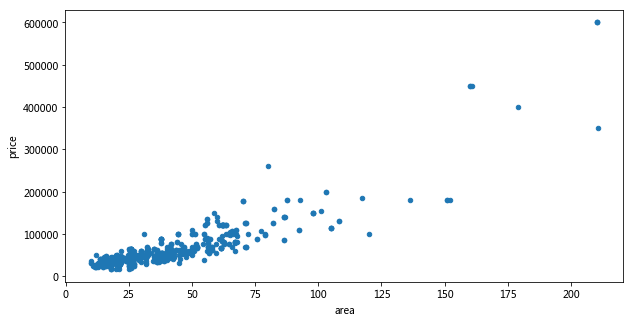

In [30]:
%pylab inline
df[['price', 'area']].plot(kind='scatter', x = 'area', y = 'price', figsize=[10,5])

In [31]:
from sklearn.linear_model import LinearRegression
y= df['price']
X = df[['area']]
regr = LinearRegression()
regr.fit(X,y)

print('Coefficient:{}'.format(regr.coef_) )
print('Intercept:{}'.format(regr.intercept_) )

Coefficient:[ 1870.29358016]
Intercept:-12116.660673529084


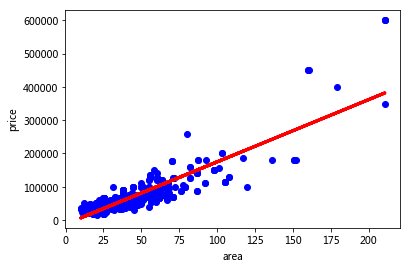

In [32]:
plt.scatter(X,y, color="blue")
plt.plot(X, regr.predict(X), linewidth = 3, color = "red")
plt.xlabel('area')
plt.ylabel('price')